<a href="https://colab.research.google.com/github/ektamistry/Machine-Learning/blob/main/Expanding_Soil_Detection_Dataset_for_Cotton_Crop_Using_Variational_Autoencoders_(VAE)_to_10%2C000_Samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_log_error




In [ ]:
url = "http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv"
df = pd.read_csv(url)


In [ ]:
df.head()

,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,...,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742,1.0
0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
1,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
2,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
3,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
4,-1.507674,-3.574550,-4.478011,-4.408275,-3.321242,-2.105171,-1.481048,-1.301362,-0.498240,-0.286928,...,1.089068,0.983369,1.014124,0.952629,0.749326,1.007076,1.634990,1.493365,-0.783134,1.0


In [ ]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)


In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Define the input shape
input_shape = (X_train_scaled.shape[1],)

# Define the encoder network with 3 layers
def build_encoder(input_shape, latent_dim):
    inputs = Input(shape=input_shape)
    x = Dense(128, activation='relu')(inputs)
    x = Dense(64, activation='relu')(x)
    x = Dense(latent_dim, activation='relu')(x)
    encoder = Model(inputs, x, name='encoder')
    return encoder

# Define the decoder network with 3 layers
def build_decoder(latent_dim, original_dim):
    latent_inputs = Input(shape=(latent_dim,))
    x = Dense(64, activation='relu')(latent_inputs)
    x = Dense(128, activation='relu')(x)
    x = Dense(original_dim, activation='sigmoid')(x)
    decoder = Model(latent_inputs, x, name='decoder')
    return decoder

# Define the full autoencoder model
def build_autoencoder(encoder, decoder):
    inputs = Input(shape=input_shape)
    encoded = encoder(inputs)
    decoded = decoder(encoded)
    autoencoder = Model(inputs, decoded, name='autoencoder')
    return autoencoder

# Set the dimensions for the latent space
latent_dim = 32  # Adjust as needed

# Build the encoder, decoder, and autoencoder models
encoder = build_encoder(input_shape, latent_dim)
decoder = build_decoder(latent_dim, input_shape[0])
autoencoder = build_autoencoder(encoder, decoder)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
epochs = 50
batch_size = 32

autoencoder.fit(X_train_scaled, X_train_scaled, epochs=epochs, batch_size=batch_size)


Epoch 1/50
125/125 [==============================] - 1s 2ms/step - loss: 0.0098
Epoch 2/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 3/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 4/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 5/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 6/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 7/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 8/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 9/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 10/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 11/50
125/125 [==============================] - 0s 2ms/step - loss: 9.4452e-04
Epoch 12/50
125/125 [==============================] - 0s 2ms/step - loss: 8.9452e-04
Epoch 13/50
125/1

In [ ]:
# Predict on the test data
X_test_pred = autoencoder.predict(X_test_scaled)

# Calculate the mean squared logarithmic error (MSLE) for each sample
msle = np.mean(np.square(np.log(X_test_scaled + 1) - np.log(X_test_pred + 1)), axis=1)

# Set a threshold for anomaly detection (you can adjust this threshold)
threshold = np.mean(msle) + 2 * np.std(msle)

# Determine anomalies based on the threshold
anomalies = np.where(msle > threshold)[0]


32/32 [==============================] - 0s 979us/step


In [ ]:
# Create a binary classification label (1 for anomaly, 0 for normal)
y_true = np.zeros(len(X_test_scaled))
y_true[anomalies] = 1

# Calculate the accuracy
accuracy = 1 - len(anomalies) / len(X_test_scaled)
print(f"Accuracy: {accuracy:.2%}")


Accuracy: 98.30%


# TASK 3

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K

In [ ]:
!pip install openpyxl

In [ ]:
df = pd.read_excel('/content/Detection of Soil for cotton crop.xlsx', engine='openpyxl')


In [ ]:
data = df
data.describe()

,Sample ID,ph,Temperature,Humidity,Density,Electrical Conductivity,N,P,K,Ca,Mg,Cotton Crop
count,48.00,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,24.50,6.819801,25.042049,66.221716,1.371875,6.716667,64.083333,55.083333,33.645833,18.672917,11.826042,0.333333
std,14.00,0.817940,4.463068,18.262961,0.191519,3.188573,43.625989,13.208368,17.982840,16.678087,5.200344,0.476393
min,1.00,4.371746,17.024985,15.658092,0.920000,0.670000,2.000000,18.000000,15.000000,3.820000,5.150000,0.000000
25%,12.75,6.337559,21.288970,60.326464,1.275000,4.967500,26.500000,47.000000,20.000000,6.117500,7.987500,0.000000
50%,24.50,6.859484,25.731311,71.584142,1.420000,6.430000,50.000000,56.000000,29.500000,8.985000,9.675000,0.000000
75%,36.25,7.348310,28.040214,78.028476,1.522500,9.085000,100.000000,60.250000,42.000000,31.797500,16.430000,1.000000
max,48.00,8.840656,36.891637,91.635362,1.680000,13.320000,143.000000,79.000000,85.000000,56.410000,24.540000,1.000000


In [ ]:
cols = data.columns[data.dtypes==object]
cols

Index(['Grain Surface', 'Particle Attached', 'Particle Spacing',
       'Particle Width'],
      dtype='object')

In [ ]:
for col in cols:
  print(data[col].value_counts())


scaly      16
gritty     15
smooth     11
fibrous     5
girtty      1
Name: Grain Surface, dtype: int64
no    48
Name: Particle Attached, dtype: int64
close      28
crowded    20
Name: Particle Spacing, dtype: int64
broad     36
narrow    11
Name: Particle Width, dtype: int64


In [ ]:
# Cotton Crop is label data and Sample ID is unwanted
target = data['Cotton Crop']
data.drop(['Sample ID','Cotton Crop'], axis=1, inplace=True)
target.value_counts()

0    32
1    16
Name: Cotton Crop, dtype: int64

In [ ]:
df = data.drop(cols, axis=1)

In [ ]:
#Scaling
norm_df = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)
norm_df.head()

,ph,Temperature,Humidity,Density,Electrical Conductivity,N,P,K,Ca,Mg
0,0.476904,0.194032,0.873217,0.000000,0.532016,0.695035,0.524590,0.400000,0.497813,0.714286
1,0.596644,0.238866,0.851064,0.157895,0.053755,0.588652,0.655738,0.371429,0.160297,0.000000
2,0.776131,0.300980,0.745785,0.565789,0.453755,0.836879,0.606557,0.414286,0.555239,0.543063
3,0.583734,0.476482,0.848942,0.236842,0.076680,0.510638,0.278689,0.357143,0.154022,0.140794
4,0.728752,0.156302,0.736362,0.526316,0.488538,0.680851,0.393443,0.385714,0.767256,0.668901


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV,RepeatedStratifiedKFold

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
img_size_1 = 10
latent_space_dim = 2

# Encoder
x = tensorflow.keras.layers.Input(shape=(img_size_1, 1, 1), name="encoder_input")

encoder_conv_layer1 = tensorflow.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), padding="same", strides=1, name="encoder_conv_1")(x)
encoder_norm_layer1 = tensorflow.keras.layers.BatchNormalization(name="encoder_norm_1")(encoder_conv_layer1)
encoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_1")(encoder_norm_layer1)

encoder_conv_layer2 = tensorflow.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", strides=1, name="encoder_conv_2")(encoder_activ_layer1)
encoder_norm_layer2 = tensorflow.keras.layers.BatchNormalization(name="encoder_norm_2")(encoder_conv_layer2)
encoder_activ_layer2 = tensorflow.keras.layers.LeakyReLU(name="encoder_activ_layer_2")(encoder_norm_layer2)

encoder_conv_layer3 = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", strides=2, name="encoder_conv_3")(encoder_activ_layer2)
encoder_norm_layer3 = tensorflow.keras.layers.BatchNormalization(name="encoder_norm_3")(encoder_conv_layer3)
encoder_activ_layer3 = tensorflow.keras.layers.LeakyReLU(name="encoder_activ_layer_3")(encoder_norm_layer3)

encoder_conv_layer4 = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", strides=2, name="encoder_conv_4")(encoder_activ_layer3)
encoder_norm_layer4 = tensorflow.keras.layers.BatchNormalization(name="encoder_norm_4")(encoder_conv_layer4)
encoder_activ_layer4 = tensorflow.keras.layers.LeakyReLU(name="encoder_activ_layer_4")(encoder_norm_layer4)

encoder_conv_layer5 = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", strides=1, name="encoder_conv_5")(encoder_activ_layer4)
encoder_norm_layer5 = tensorflow.keras.layers.BatchNormalization(name="encoder_norm_5")(encoder_conv_layer5)
encoder_activ_layer5 = tensorflow.keras.layers.LeakyReLU(name="encoder_activ_layer_5")(encoder_norm_layer5)

shape_before_flatten = tensorflow.keras.backend.int_shape(encoder_activ_layer5)[1:]
encoder_flatten = tensorflow.keras.layers.Flatten()(encoder_activ_layer5)

encoder_mu = tensorflow.keras.layers.Dense(units=latent_space_dim, name="encoder_mu")(encoder_flatten)
encoder_log_variance = tensorflow.keras.layers.Dense(units=latent_space_dim, name="encoder_log_variance")(encoder_flatten)

encoder_mu_log_variance_model = tensorflow.keras.models.Model(x, (encoder_mu, encoder_log_variance), name="encoder_mu_log_variance_model")

def sampling(mu_log_variance):
    mu, log_variance = mu_log_variance
    epsilon = tensorflow.keras.backend.random_normal(shape=tensorflow.keras.backend.shape(mu), mean=0.0, stddev=1.0)
    random_sample = mu + tensorflow.keras.backend.exp(log_variance/2) * epsilon
    return random_sample

encoder_output = tensorflow.keras.layers.Lambda(sampling, name="encoder_output")([encoder_mu, encoder_log_variance])

encoder = tensorflow.keras.models.Model(x, encoder_output, name="encoder_model")



In [ ]:
decoder_input = tensorflow.keras.layers.Input(shape=(latent_space_dim), name="decoder_input")

decoder_dense_layer1 = tensorflow.keras.layers.Dense(units=640, name="decoder_dense_1")(decoder_input)
decoder_reshape = tensorflow.keras.layers.Reshape(target_shape=(10,1,64))(decoder_dense_layer1)

decoder_conv_tran_layer1 = tensorflow.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), padding="same", strides=1, name="decoder_conv_tran_1")(decoder_reshape)
decoder_norm_layer1 = tensorflow.keras.layers.BatchNormalization(name="decoder_norm_1")(decoder_conv_tran_layer1)
decoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_1")(decoder_norm_layer1)

decoder_conv_tran_layer2 = tensorflow.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), padding="same", strides=1, name="decoder_conv_tran_2")(decoder_activ_layer1)
decoder_norm_layer2 = tensorflow.keras.layers.BatchNormalization(name="decoder_norm_2")(decoder_conv_tran_layer2)
decoder_activ_layer2 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_2")(decoder_norm_layer2)

decoder_conv_tran_layer3 = tensorflow.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), padding="same", strides=1, name="decoder_conv_tran_3")(decoder_activ_layer2)
decoder_norm_layer3 = tensorflow.keras.layers.BatchNormalization(name="decoder_norm_3")(decoder_conv_tran_layer3)
decoder_activ_layer3 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_3")(decoder_norm_layer3)

decoder_conv_tran_layer4 = tensorflow.keras.layers.Conv2DTranspose(filters=1, kernel_size=(2, 2), padding="same", strides=1, name="decoder_conv_tran_4")(decoder_activ_layer3)
decoder_output = tensorflow.keras.layers.LeakyReLU(name="decoder_output")(decoder_conv_tran_layer4 )
decode = tensorflow.keras.layers.Reshape(target_shape=(10,1,1))
decoder = tensorflow.keras.models.Model(decoder_input, decoder_output, name="decoder_model")



In [ ]:
encoder.summary()

Model: "encoder_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 10, 1, 1)]   0           []                               
                                                                                                  
 encoder_conv_1 (Conv2D)        (None, 10, 1, 1)     10          ['encoder_input[0][0]']          
                                                                                                  
 encoder_norm_1 (BatchNormaliza  (None, 10, 1, 1)    4           ['encoder_conv_1[0][0]']         
 tion)                                                                                            
                                                                                                  
 encoder_leakyrelu_1 (LeakyReLU  (None, 10, 1, 1)    0           ['encoder_norm_1[0][0

In [ ]:
decoder.summary()

Model: "decoder_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder_input (InputLayer)  [(None, 2)]               0         
                                                                 
 decoder_dense_1 (Dense)     (None, 640)               1920      
                                                                 
 reshape_3 (Reshape)         (None, 10, 1, 64)         0         
                                                                 
 decoder_conv_tran_1 (Conv2D  (None, 10, 1, 64)        36928     
 Transpose)                                                      
                                                                 
 decoder_norm_1 (BatchNormal  (None, 10, 1, 64)        256       
 ization)                                                        
                                                                 
 decoder_leakyrelu_1 (LeakyR  (None, 10, 1, 64)      

In [ ]:
# loss function / Reparametrization
def loss_func(encoder_mu, encoder_log_variance):
    def vae_reconstruction_loss(y_true, y_predict):

        reconstruction_loss_factor = 1000
        reconstruction_loss = tensorflow.keras.backend.mean(tensorflow.keras.backend.square(y_true-y_predict), axis=[1, 2, 3])
        return reconstruction_loss_factor * reconstruction_loss

    def vae_kl_loss(encoder_mu, encoder_log_variance):
        kl_loss = -0.5 * tensorflow.keras.backend.sum(1.0 + encoder_log_variance - tensorflow.keras.backend.square(encoder_mu) - tensorflow.keras.backend.exp(encoder_log_variance), axis=1)
        return kl_loss

    def vae_kl_loss_metric(y_true, y_predict):
        kl_loss = -0.5 * tensorflow.keras.backend.sum(1.0 + encoder_log_variance - tensorflow.keras.backend.square(encoder_mu) - tensorflow.keras.backend.exp(encoder_log_variance), axis=1)
        return kl_loss

    def vae_loss(y_true, y_predict):
        reconstruction_loss = vae_reconstruction_loss(y_true, y_predict)
        kl_loss = vae_kl_loss(y_true, y_predict)

        loss = reconstruction_loss + kl_loss
        return loss

    return vae_loss

In [ ]:
# encoder + decoder
vae_input = tensorflow.keras.layers.Input(shape=(img_size_1, 1, 1), name="VAE_input")
vae_encoder_output = encoder(vae_input)
vae_decoder_output = decoder(vae_encoder_output)
vae = tensorflow.keras.models.Model(vae_input, vae_decoder_output, name="VAE")
vae.summary()

Model: "VAE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 VAE_input (InputLayer)      [(None, 10, 1, 1)]        0         
                                                                 
 encoder_model (Functional)  (None, 2)                 94354     
                                                                 
 decoder_model (Functional)  (None, 10, 1, 1)          113729    
                                                                 
Total params: 208,083
Trainable params: 207,249
Non-trainable params: 834
_________________________________________________________________


In [ ]:
# compile
vae.compile(optimizer=tensorflow.keras.optimizers.Adam(lr=0.0005), loss=loss_func(encoder_mu, encoder_log_variance))

In [ ]:
norm_df.shape

(48, 10)

In [ ]:
col_index  = {i:j for i, j in enumerate(norm_df.iloc[0].index.to_list())}
col_index

{0: 'ph',
 1: 'Temperature',
 2: 'Humidity',
 3: 'Density',
 4: 'Electrical Conductivity',
 5: 'N',
 6: 'P',
 7: 'K',
 8: 'Ca',
 9: 'Mg'}

In [ ]:
reshaped_array = np.array(norm_df).reshape(-1, 10, 1, 1)
reshaped_array.shape

(48, 10, 1, 1)

In [ ]:
# training
vae.fit(reshaped_array, reshaped_array, epochs=500, batch_size=10, shuffle=True)

Epoch 1/500
5/5 [==============================] - 1s 107ms/step - loss: 12.4743
Epoch 2/500
5/5 [==============================] - 1s 117ms/step - loss: 12.0225
Epoch 3/500
5/5 [==============================] - 1s 108ms/step - loss: 13.9081
Epoch 4/500
5/5 [==============================] - 1s 111ms/step - loss: 12.8162
Epoch 5/500
5/5 [==============================] - 1s 112ms/step - loss: 12.4065
Epoch 6/500
5/5 [==============================] - 1s 117ms/step - loss: 13.7310
Epoch 7/500
5/5 [==============================] - 1s 110ms/step - loss: 12.2889
Epoch 8/500
5/5 [==============================] - 1s 111ms/step - loss: 11.4331
Epoch 9/500
5/5 [==============================] - 1s 110ms/step - loss: 13.0034
Epoch 10/500
5/5 [==============================] - 1s 115ms/step - loss: 10.8400
Epoch 11/500
5/5 [==============================] - 1s 112ms/step - loss: 12.5369
Epoch 12/500
5/5 [==============================] - 1s 108ms/step - loss: 13.1949
Epoch 13/500
5/5 [=======

In [ ]:
# Passing any random 2 numbers to decoder
z_sample = np.array([[-1, 0.6]])
decoder.predict(z_sample)

1/1 [==============================] - 0s 40ms/step


array([[[[0.453797  ]],

        [[0.11040942]],

        [[0.37340438]],

        [[0.17943338]],

        [[0.47065443]],

        [[0.50481045]],

        [[0.4532929 ]],

        [[0.20118546]],

        [[0.14842   ]],

        [[0.39638352]]]], dtype=float32)

In [ ]:
# Generating 4 rows of synthetic data

scale = 1.0
n = 2
grid_x = np.linspace(-scale, scale, n)
grid_y = np.linspace(-scale, scale, n)

In [ ]:
synthetic_data = []
for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        synthetic_data.append(x_decoded[0])

1/1 [==============================] - 0s 46ms/step


In [ ]:
np.array(synthetic_data).reshape(-1, 10)

array([[0.3485162 , 0.11019389, 0.24667189, 0.4497956 , 0.5196497 ,
        0.27002177, 0.48822695, 0.3332017 , 0.19096461, 0.34593362],
       [0.33687672, 0.36108017, 0.48486465, 0.49981704, 0.30299127,
        0.25802815, 0.7753212 , 0.12769458, 0.04086124, 0.18190652],
       [0.48061025, 0.13852614, 0.432203  , 0.12127881, 0.45555255,
        0.55971617, 0.449037  , 0.15551606, 0.12873831, 0.3840664 ],
       [0.45030624, 0.26339695, 0.5793816 , 0.29886615, 0.26573935,
        0.47678578, 0.6627459 , 0.02666771, 0.07944091, 0.15388238]],
      dtype=float32)

In [ ]:
pd.DataFrame(np.array(synthetic_data).reshape(-1, 10), columns=col_index.values())

,ph,Temperature,Humidity,Density,Electrical Conductivity,N,P,K,Ca,Mg
0,0.348516,0.110194,0.246672,0.449796,0.519650,0.270022,0.488227,0.333202,0.190965,0.345934
1,0.336877,0.361080,0.484865,0.499817,0.302991,0.258028,0.775321,0.127695,0.040861,0.181907
2,0.480610,0.138526,0.432203,0.121279,0.455553,0.559716,0.449037,0.155516,0.128738,0.384066
3,0.450306,0.263397,0.579382,0.298866,0.265739,0.476786,0.662746,0.026668,0.079441,0.153882


In [ ]:
# generating more data  100 X 100

scale = 1.0
n = 100
grid_x = np.linspace(-scale, scale, n)
grid_y = np.linspace(-scale, scale, n)

synthetic_data = []
for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        synthetic_data.append(x_decoded[0])

syn_data = np.array(synthetic_data).reshape(-1, 10)
synth_data = pd.DataFrame(syn_data, columns=col_index.values())

1/1 [==============================] - 0s 42ms/step


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 29ms/step


In [ ]:
synth_data

,ph,Temperature,Humidity,Density,Electrical Conductivity,N,P,K,Ca,Mg
0,0.348516,0.110194,0.246672,0.449796,0.519650,0.270022,0.488227,0.333202,0.190965,0.345934
1,0.347458,0.111854,0.248559,0.451054,0.517824,0.269763,0.491416,0.331352,0.190370,0.344687
2,0.346400,0.113514,0.250445,0.452312,0.515999,0.269504,0.494590,0.329865,0.189876,0.343441
3,0.345222,0.115411,0.252387,0.453570,0.514145,0.269250,0.497828,0.328438,0.189498,0.341923
4,0.344026,0.117306,0.254331,0.454827,0.512369,0.269002,0.501161,0.326957,0.189000,0.340332
...,...,...,...,...,...,...,...,...,...,...
9995,0.451494,0.255104,0.575354,0.293077,0.277603,0.478260,0.663530,0.031144,0.080082,0.163884
9996,0.451126,0.257194,0.576303,0.294500,0.274690,0.477886,0.663337,0.030041,0.079783,0.161291
9997,0.450756,0.259285,0.577254,0.296048,0.271749,0.477509,0.663134,0.028948,0.079515,0.158688
9998,0.450506,0.261336,0.578294,0.297450,0.268798,0.477103,0.662938,0.027887,0.079244,0.156050


In [ ]:
import seaborn as sns

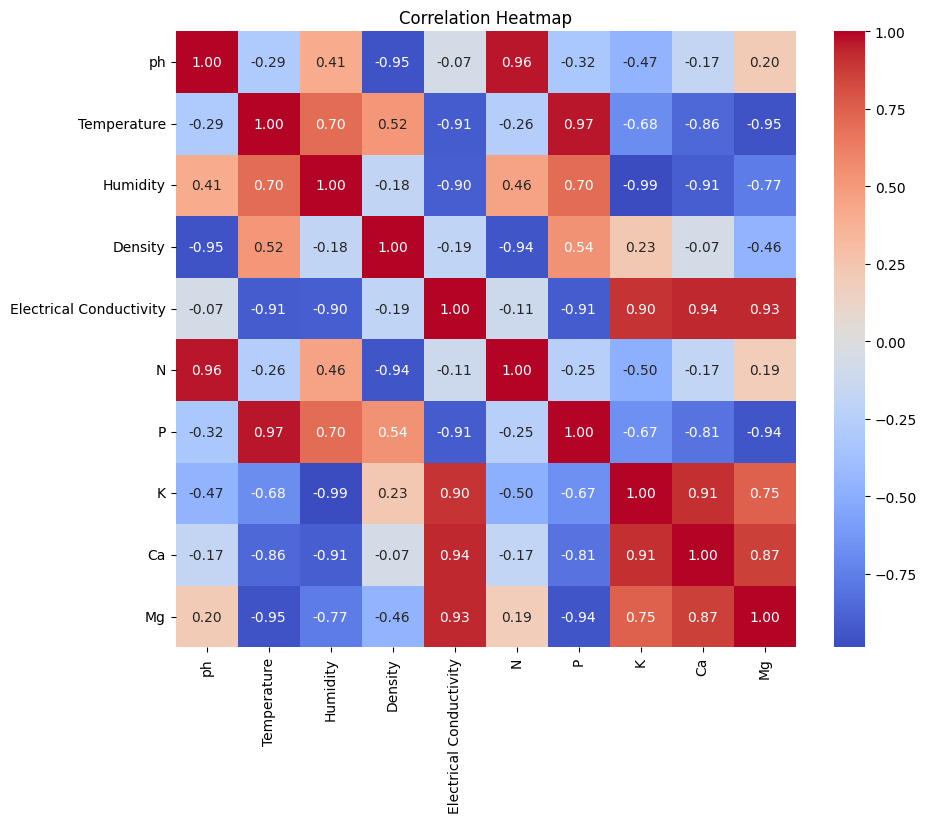

In [ ]:
# Visualization: Correlation heatmap
correlation_matrix = synth_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


dataset used - Soil detection for cotton crop

using Variational Auto Encoders (VAE) which is a deep learning architecture and a generative model that will create a latent distribution out of the dataset from where we can generate new datapoints of the same distribution.

Using VAE I will increase the size of the dataset from 48 to 10,000.